# Linear Regression

## The Normal Equation

* Let's generate some linear-looking data to test this equation:

In [1]:
import numpy as np
np.random.seed(42) # to make this code example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

*  Now let’s compute θ^ using the Normal equation. We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.21509616],
       [2.77011339]])

* Now we can make predictions using θ^:

In [3]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

* Let's plot this model's predictions:

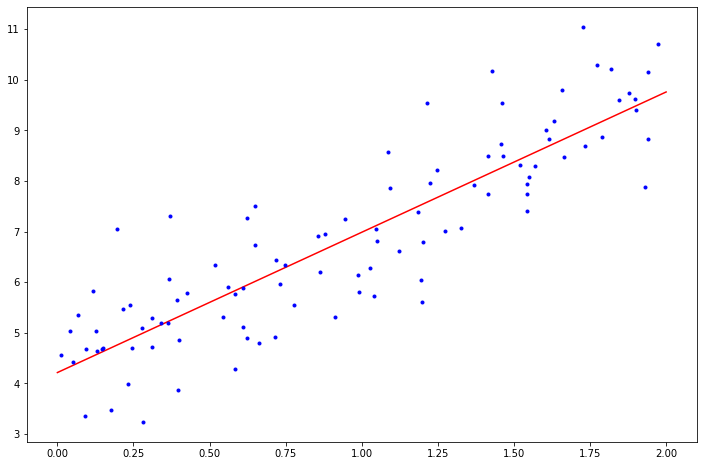

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

* Performing linear regression using Scikit-Learn is relatively straightforward:

In [5]:
from sklearn.linear_model import LinearRegression
lin_req = LinearRegression()
lin_req.fit(X, y)
lin_req.intercept_, lin_req.coef_

(array([4.21509616]), array([[2.77011339]]))

In [6]:
lin_req.predict(X_new)

array([[4.21509616],
       [9.75532293]])

* Notice that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

* This function computes θ^=X+y, where X+ is the pseudoinverse of X (specifically, the Moore–Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [8]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

* Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

### Batch Gradient Descent

* To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter θ . In other words, you need to calculate how much the cost function will change if you change θ just a little bit. This is called a partial derivative.

 * Let’s look at a quick implementation of this algorithm:

In [9]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

In [10]:
np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta-y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

* That’s exactly what the Normal equation found!